In [5]:
#Install prophet library for later analysis
!pip install prophet

In [6]:
# Import the required libraries and dependencies
import pandas as pd
import ast
from pathlib import Path
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
%matplotlib inline
from prophet import Prophet
import datetime as dt

In [7]:
#Import csv file to be used for analysis

OriginalFile = Path('../data/cleaned.csv')
Original_df = pd.read_csv(OriginalFile)

In [8]:
#display original dataframe from imported data
Original_df.head()

,@type,@id,name,description,minplayers,maxplayers,poll,playingtime,minplaytime,maxplaytime,...,seriescode,issueindex,year,categories,mechanics,family,implementation,designer,artist,publisher
0,boardgame,1,Die Macher,Die Macher is a game about seven sequential po...,3,5,"[{'@name': 'suggested_numplayers', '@title': '...",240,240,240,...,NaN,NaN,1986,"['Economic', 'Negotiation', 'Political']","['Alliances', 'Area Majority / Influence', 'Au...","['Country: Germany', 'Digital Implementations:...",[],['Karl-Heinz Schmiel'],"['Bernd Brunnhofer', 'Marcus Gschwendtner', 'H...","['Hans im Glück', 'Moskito Spiele', 'Ediciones..."
1,boardgame,2,Dragonmaster,Dragonmaster is a trick-taking card game based...,3,4,"[{'@name': 'suggested_numplayers', '@title': '...",30,30,30,...,NaN,NaN,1981,"['Card Game', 'Fantasy']",['Trick-taking'],"['Components: Gems/Crystals', 'Creatures: Drag...","['Indulgence', ""Coup d'État""]","['G. W. ""Jerry"" D\'Arcey']",['Bob Pepper'],"['E. S. Lowe Company Inc.', 'Milton Bradley']"
2,boardgame,3,Samurai,Samurai is set in medieval Japan. Players comp...,2,4,"[{'@name': 'suggested_numplayers', '@title': '...",60,30,60,...,NaN,NaN,1998,"['Abstract Strategy', 'Medieval']","['Area Majority / Influence', 'Hand Management...",['Components: Map (Continental / National scal...,['Samurai: The Card Game'],['Reiner Knizia'],['Franz Vohwinkel'],"['Fantasy Flight Games', 'Hans im Glück', '999..."
3,boardgame,4,Tal der Könige,When you see the triangular box and the luxuri...,2,4,"[{'@name': 'suggested_numplayers', '@title': '...",60,60,60,...,NaN,NaN,1992,['Ancient'],"['Action Points', 'Area Majority / Influence',...","['Containers: Triangular Boxes', 'Country: Egy...",[],['Christian Beierer'],['Thomas di Paolo'],['KOSMOS']
4,boardgame,5,Acquire,"In Acquire, each player strategically invests ...",2,6,"[{'@name': 'suggested_numplayers', '@title': '...",90,90,90,...,NaN,NaN,1963,"['Economic', 'Territory Building']","['Hand Management', 'Investment', 'Market', 'S...","['Components: 9 x 12 Grids', 'Digital Implemen...",[],['Sid Sackson'],"['Eric Hibbeler', ""Scott O'Gara"", 'Scott Okumu...","['3M', 'The Avalon Hill Game Co', 'Avalon Hill..."


In [9]:
#exploding the link column to see if any values there may be something we want to use for this particular analysis
link_df = Original_df[['link']]
link_df.explode('link')
pd.set_option('display.max_colwidth',None)
link_df.head(1)


,link
0,"[{'@type': 'boardgamecategory', '@id': '1021', '@value': 'Economic'}, {'@type': 'boardgamecategory', '@id': '1026', '@value': 'Negotiation'}, {'@type': 'boardgamecategory', '@id': '1001', '@value': 'Political'}, {'@type': 'boardgamemechanic', '@id': '2916', '@value': 'Alliances'}, {'@type': 'boardgamemechanic', '@id': '2080', '@value': 'Area Majority / Influence'}, {'@type': 'boardgamemechanic', '@id': '2012', '@value': 'Auction/Bidding'}, {'@type': 'boardgamemechanic', '@id': '2072', '@value': 'Dice Rolling'}, {'@type': 'boardgamemechanic', '@id': '2040', '@value': 'Hand Management'}, {'@type': 'boardgamemechanic', '@id': '2020', '@value': 'Simultaneous Action Selection'}, {'@type': 'boardgamefamily', '@id': '10643', '@value': 'Country: Germany'}, {'@type': 'boardgamefamily', '@id': '81575', '@value': 'Digital Implementations: VASSAL'}, {'@type': 'boardgamefamily', '@id': '34116', '@value': 'Political: Elections'}, {'@type': 'boardgamefamily', '@id': '91', '@value': 'Series: Classic Line (Valley Games)'}, {'@type': 'boardgamedesigner', '@id': '1', '@value': 'Karl-Heinz Schmiel'}, {'@type': 'boardgameartist', '@id': '928', '@value': 'Bernd Brunnhofer'}, {'@type': 'boardgameartist', '@id': '12517', '@value': 'Marcus Gschwendtner'}, {'@type': 'boardgameartist', '@id': '4959', '@value': 'Harald Lieske'}, {'@type': 'boardgamepublisher', '@id': '133', '@value': 'Hans im Glück'}, {'@type': 'boardgamepublisher', '@id': '2', '@value': 'Moskito Spiele'}, {'@type': 'boardgamepublisher', '@id': '24883', '@value': 'Ediciones MasQueOca'}, {'@type': 'boardgamepublisher', '@id': '2726', '@value': 'Portal Games'}, {'@type': 'boardgamepublisher', '@id': '15108', '@value': 'Spielworxx'}, {'@type': 'boardgamepublisher', '@id': '39249', '@value': 'sternenschimmermeer'}, {'@type': 'boardgamepublisher', '@id': '11652', '@value': 'Stronghold Games'}, {'@type': 'boardgamepublisher', '@id': '5382', '@value': 'Valley Games, Inc.'}, {'@type': 'boardgamepublisher', '@id': '8147', '@value': 'YOKA Games'}]"


In [10]:
#creating a dataframe from the original dataframe with the columns we want to keep for this analysis.

Mechanics_df = Original_df[['mechanics','year','playingtime',]]
Mechanics_df.dtypes

mechanics      object
year            int64
playingtime     int64
dtype: object

In [11]:
# Remove brackets from mechanics
Mechanics_df['mechanics'] = Mechanics_df['mechanics'].str.replace('[','')
Mechanics_df['mechanics'] = Mechanics_df['mechanics'].str.replace(']','')
# Take each value in the mechanics column and create a new row for each value
Mechanics_df = Mechanics_df.assign(mechanics=Mechanics_df['mechanics'].str.split(', ')).explode('mechanics')

C:\Users\ikerm\AppData\Local\Temp\ipykernel_15228\4021080151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mechanics_df['mechanics'] = Mechanics_df['mechanics'].str.replace('[','')
C:\Users\ikerm\AppData\Local\Temp\ipykernel_15228\4021080151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mechanics_df['mechanics'] = Mechanics_df['mechanics'].str.replace(']','')


In [12]:
Mechanics_df['mechanics'] = Mechanics_df['mechanics'].str.replace("'","")
Mechanics_df = Mechanics_df.reset_index(drop=True)
display(Mechanics_df.head())
display(Mechanics_df.tail())

,mechanics,year,playingtime
0,Alliances,1986,240
1,Area Majority / Influence,1986,240
2,Auction/Bidding,1986,240
3,Dice Rolling,1986,240
4,Hand Management,1986,240


,mechanics,year,playingtime
290328,Lose a Turn,2019,180
290329,Player Elimination,2019,180
290330,Roll / Spin and Move,2019,180
290331,Track Movement,2019,180
290332,Trading,2019,180


In [13]:
Mechanics_df = Mechanics_df.dropna()
Mechanics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290209 entries, 0 to 290332
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   mechanics    290209 non-null  object
 1   year         290209 non-null  int64 
 2   playingtime  290209 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.9+ MB


In [14]:
#grouping certain mechanics into 1 mechanic 
mechanics_mappings = ['Auction','Drafting','Grid-Based', 'Worker Placement']
for mapping in mechanics_mappings:
    pattern = f'^.*{mapping}.*$'
    Mechanics_df['mechanics'] = Mechanics_df['mechanics'].apply(lambda x: re.sub(pattern, mapping, x))
    

In [15]:
Mechanics_Year = Mechanics_df[['year','mechanics']]


In [38]:
#get a total count of each mechanic in the table and create a new mechanic dataframe

def get_counts(data,metric):
    new_df = data[[metric]]
    new_df['val'] = 1
    new_df = new_df.groupby(metric).sum()
    return new_df

mechanics_count = get_counts(Mechanics_Year,'mechanics')
mechanics_count = mechanics_count.drop('')
display(mechanics_count.sort_values('val', ascending=False).head(25))
display(mechanics_count.sort_values('val', ascending=False).tail(20))

,val
mechanics,
Dice Rolling,27134
Roll / Spin and Move,16773
Hand Management,14545
Set Collection,13603
Drafting,8312
Hexagon Grid,7498
Simulation,7386
Variable Player Powers,7200
Cooperative Game,6884


,val
mechanics,
Random Production,86
Force Commitment,82
Minimap Resolution,77
Automatic Resource Growth,75
Impulse Movement,75
"""Prisoners Dilemma""",70
Relative Movement,70
Spelling,67
Turn Order: Role Order,64


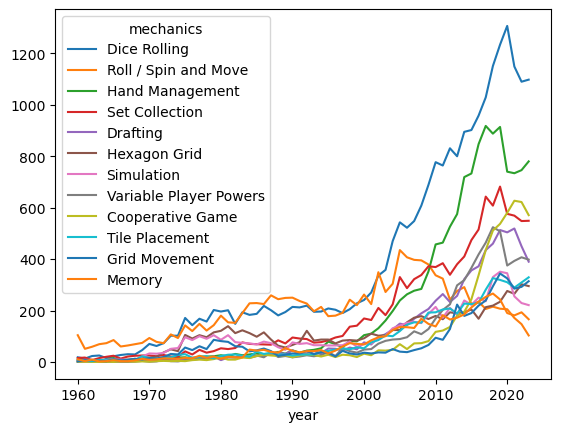

In [18]:
#There are too many mechanics, so we concentrate on the top mechanics from the list as otherwise the graph would not make sense.

def pivot(data,metric):
    new_df = data.copy()
    new_df['val'] = 1
    new_df = new_df.pivot_table(index='year', columns=metric, values='val', aggfunc='sum', fill_value=0)
    new_df = new_df.loc[new_df.index >= 1960].copy()
    new_df = new_df.loc[new_df.index < 2024].copy()
    return new_df

mechanics_pivot = pivot(Mechanics_Year,'mechanics')
mechanics_pivot[['Dice Rolling','Roll / Spin and Move','Hand Management','Set Collection','Drafting','Hexagon Grid','Simulation','Variable Player Powers','Cooperative Game','Tile Placement','Grid Movement','Memory']].plot()
#plt.show()
plt.savefig('../charts/TopMechanicsTotalGraph.jpg')

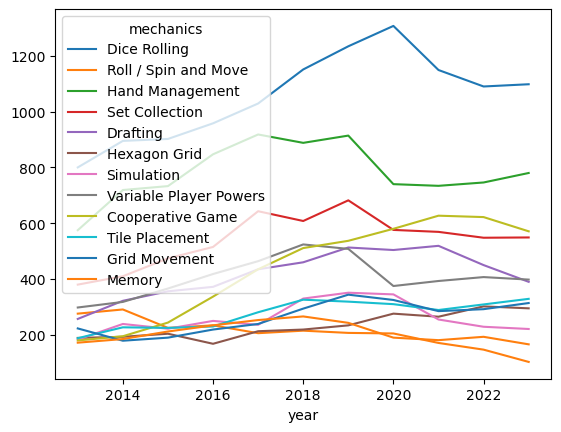

In [19]:
#There are too many mechanics, so we concentrate on the top mechanics from the list as otherwise the graph would not make sense. 
# But now only looking at the last 10 years.

def pivot(data,metric):
    new_df = data.copy()
    new_df['val'] = 1
    new_df = new_df.pivot_table(index='year', columns=metric, values='val', aggfunc='sum', fill_value=0)
    new_df = new_df.loc[new_df.index >= 2013].copy()
    new_df = new_df.loc[new_df.index < 2024].copy()
    return new_df

mechanics_pivot_lastdecade = pivot(Mechanics_Year,'mechanics')
mechanics_pivot_lastdecade[['Dice Rolling','Roll / Spin and Move','Hand Management','Set Collection','Drafting','Hexagon Grid','Simulation','Variable Player Powers','Cooperative Game','Tile Placement','Grid Movement','Memory']].plot()
#plt.show()
plt.savefig('../charts/TopMechanicsLastDecade.jpg')

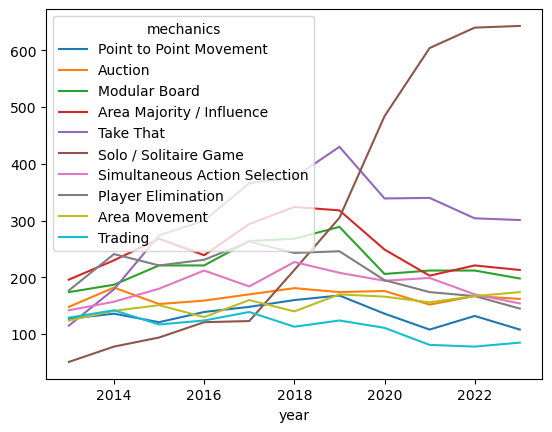

In [41]:
mechanics_pivot_Next10 = pivot(Mechanics_Year,'mechanics')
mechanics_pivot_Next10[['Point to Point Movement','Auction','Modular Board','Area Majority / Influence','Take That','Solo / Solitaire Game','Simultaneous Action Selection','Player Elimination','Area Movement','Trading']].plot()
#plt.show()
plt.savefig('../charts/Next10Mechanics.jpg')

In [ ]:
mechanics_pivot_lastdecade[['Dice Rolling','Roll / Spin and Move','Hand Management','Set Collection','Drafting','Hexagon Grid','Simulation','Variable Player Powers','Cooperative Game','Tile Placement','Grid Movement','Memory']]

mechanics,Dice Rolling,Roll / Spin and Move,Hand Management,Set Collection,Drafting,Hexagon Grid,Simulation,Variable Player Powers,Cooperative Game,Tile Placement,Grid Movement,Memory
year,,,,,,,,,,,,
2013,800,276,575,380,257,189,183,298,180,188,223,172
2014,895,291,719,410,322,193,239,318,195,227,179,185
2015,902,225,733,474,356,204,222,366,244,225,190,212
2016,958,234,847,515,372,168,250,418,337,230,219,234
2017,1029,206,918,643,435,213,236,464,435,281,239,253
2018,1151,215,888,608,460,219,330,524,511,326,294,266
2019,1234,207,914,682,513,234,351,508,537,319,344,243
2020,1307,205,740,576,504,276,345,375,580,310,325,190
2021,1149,171,734,569,519,265,255,393,627,289,285,181


In [21]:
#get the average playtime per top mechanic

def playingtime(data,metric,value):
    new_df = data.copy()
    new_df = new_df.pivot_table(index='year',columns=metric, values=value, aggfunc='mean')
    new_df = new_df.loc[new_df.index >= 1960].copy()
    new_df = new_df.loc[new_df.index < 2024].copy()
    return new_df

playingtime_pivot_all = playingtime(Mechanics_df,'mechanics','playingtime')
playingtime_pivot_all.drop(playingtime_pivot_all.iloc[:,0:1], axis=1,inplace=True)
#playingtime_pivot
playingtime_top_all = playingtime_pivot_all[['Dice Rolling','Roll / Spin and Move','Hand Management','Set Collection','Drafting','Hexagon Grid','Simulation','Variable Player Powers','Cooperative Game','Tile Placement','Grid Movement','Memory']]
playingtime_all = playingtime_top_all.sort_index(ascending=False)

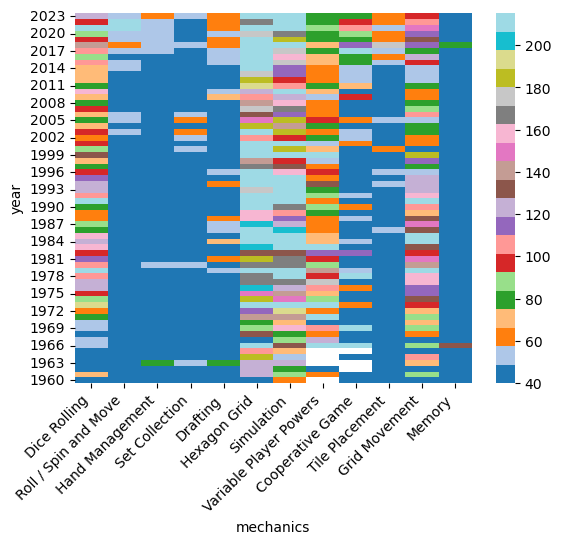

In [37]:
vmin = 40
vmax = 215
Heatmap_1 = sns.heatmap(data=playingtime_all, vmin=vmin, vmax=vmax, cmap='tab20')
_ = Heatmap_1.set_xticklabels(Heatmap_1.get_xticklabels(), rotation =45, ha='right')
plt.savefig('../charts/AveragePlayGlobal.jpg')

In [23]:
#get the average playtime per top mechanic for the last decade

def playingtime(data,metric,value):
    new_df = data.copy()
    new_df = new_df.pivot_table(index='year',columns=metric, values=value, aggfunc='mean')
    new_df = new_df.loc[new_df.index >= 2013].copy()
    new_df = new_df.loc[new_df.index < 2024].copy()
    return new_df

playingtime_pivot = playingtime(Mechanics_df,'mechanics','playingtime')
playingtime_pivot.drop(playingtime_pivot.iloc[:,0:1], axis=1,inplace=True)
#playingtime_pivot
playingtime_top = playingtime_pivot[['Dice Rolling','Roll / Spin and Move','Hand Management','Set Collection','Drafting','Hexagon Grid','Simulation','Variable Player Powers','Cooperative Game','Tile Placement','Grid Movement','Memory']]
playingtime_last_decade = playingtime_top.sort_index(ascending=False)

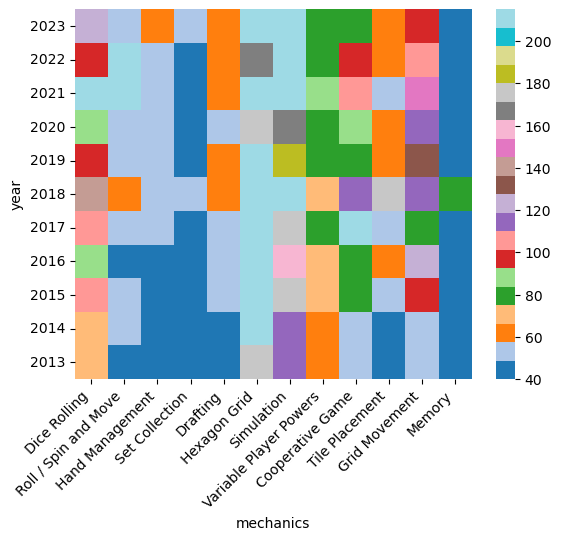

In [36]:

vmin = 40
vmax = 215
Heatmap_2 = sns.heatmap(data=playingtime_last_decade, vmin=vmin, vmax=vmax, cmap='tab20')
_ = Heatmap_2.set_xticklabels(Heatmap_2.get_xticklabels(), rotation =45, ha='right')


plt.savefig('../charts/AveragePlayTimeLastDecade.jpg')

In [42]:
playingtime_pivot_next10 = playingtime(Mechanics_df,'mechanics','playingtime')
playingtime_pivot_next10.drop(playingtime_pivot.iloc[:,0:1], axis=1,inplace=True)
#playingtime_pivot
playingtime_next10 = playingtime_pivot_next10[['Point to Point Movement','Auction','Modular Board','Area Majority / Influence','Take That','Solo / Solitaire Game','Simultaneous Action Selection','Player Elimination','Area Movement','Trading']]
playingtime_last_decade_next10 = playingtime_next10.sort_index(ascending=False)

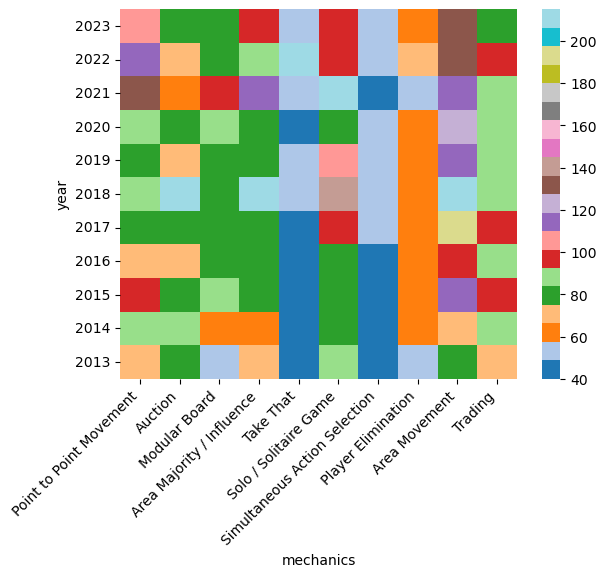

In [43]:
vmin = 40
vmax = 215
Heatmap_3 = sns.heatmap(data=playingtime_last_decade_next10, vmin=vmin, vmax=vmax, cmap='tab20')
_ = Heatmap_3.set_xticklabels(Heatmap_3.get_xticklabels(), rotation =45, ha='right')


plt.savefig('../charts/AveragePlayTimeLastDecadeNext10.jpg')

In [25]:
#getting average playtime total per year.

def playingtime_avg(data,value):
    new_df = data.copy()
    new_df = new_df.pivot_table(index=('year'), values=value, aggfunc='mean')
    new_df = new_df.loc[new_df.index >= 1960].copy()
    new_df = new_df.loc[new_df.index < 2024].copy()
    return new_df

average_playingtime_pivot = playingtime_avg(Mechanics_df,'playingtime')
average_playingtime_pivot

,playingtime
year,
1960,29.861963
1961,45.187500
1962,33.638132
1963,37.547244
1964,32.032609
...,...
2019,79.153598
2020,1936.834056
2021,3980.648058


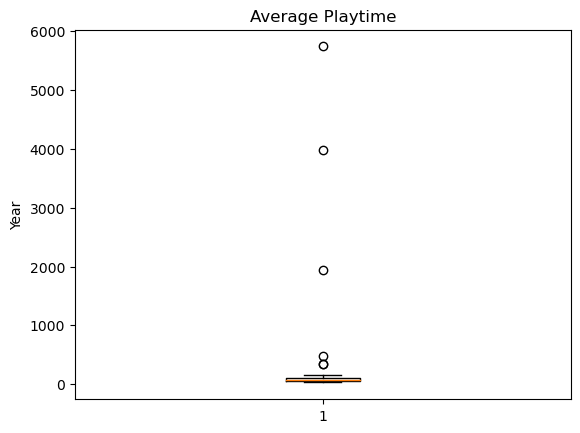

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Average Playtime')
ax1.set_ylabel('Year')
ax1.boxplot(average_playingtime_pivot)
plt.show()

In [27]:
#reset index prepare for prophet
average_playingtime_pivot.reset_index(inplace=True)
average_playingtime_pivot['year'] = pd.to_datetime(average_playingtime_pivot.year, format='%Y')
average_playingtime_pivot.columns = ['ds','y']
average_playingtime_pivot


,ds,y
0,1960-01-01,29.861963
1,1961-01-01,45.187500
2,1962-01-01,33.638132
3,1963-01-01,37.547244
4,1964-01-01,32.032609
...,...,...
59,2019-01-01,79.153598
60,2020-01-01,1936.834056
61,2021-01-01,3980.648058
62,2022-01-01,5741.867081


In [28]:
# Call the Prophet function, store as an object
m = Prophet()

In [29]:
# Fit the time-series model.
m.fit(average_playingtime_pivot)

13:51:10 - cmdstanpy - INFO - Chain [1] start processing
13:51:10 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10years
future_playtime_trends = m.make_future_dataframe(periods=10, freq='Y')

# View the last five rows of the future_mercado_trends DataFrame
display(future_playtime_trends.tail())

,ds
69,2028-12-31
70,2029-12-31
71,2030-12-31
72,2031-12-31
73,2032-12-31


In [31]:
# Make the predictions for the trend data using the future_playtime_trends
forecast_playtime_trends = m.predict(future_playtime_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_playtime_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,188.864937,-1386.212078,672.655573,188.864937,188.864937,-535.775501,-535.775501,-535.775501,-535.775501,-535.775501,-535.775501,0.0,0.0,0.0,-346.910564
1,1961-01-01,204.950801,-1147.933669,956.510650,204.950801,204.950801,-315.687534,-315.687534,-315.687534,-315.687534,-315.687534,-315.687534,0.0,0.0,0.0,-110.736732
2,1962-01-01,220.992715,-1255.925622,857.099541,220.992715,220.992715,-393.373247,-393.373247,-393.373247,-393.373247,-393.373247,-393.373247,0.0,0.0,0.0,-172.380532
3,1963-01-01,237.034628,-1283.446859,838.531898,237.034628,237.034628,-466.767880,-466.767880,-466.767880,-466.767880,-466.767880,-466.767880,0.0,0.0,0.0,-229.733252
4,1964-01-01,253.076542,-1342.276197,808.533497,253.076542,253.076542,-535.775501,-535.775501,-535.775501,-535.775501,-535.775501,-535.775501,0.0,0.0,0.0,-282.698959


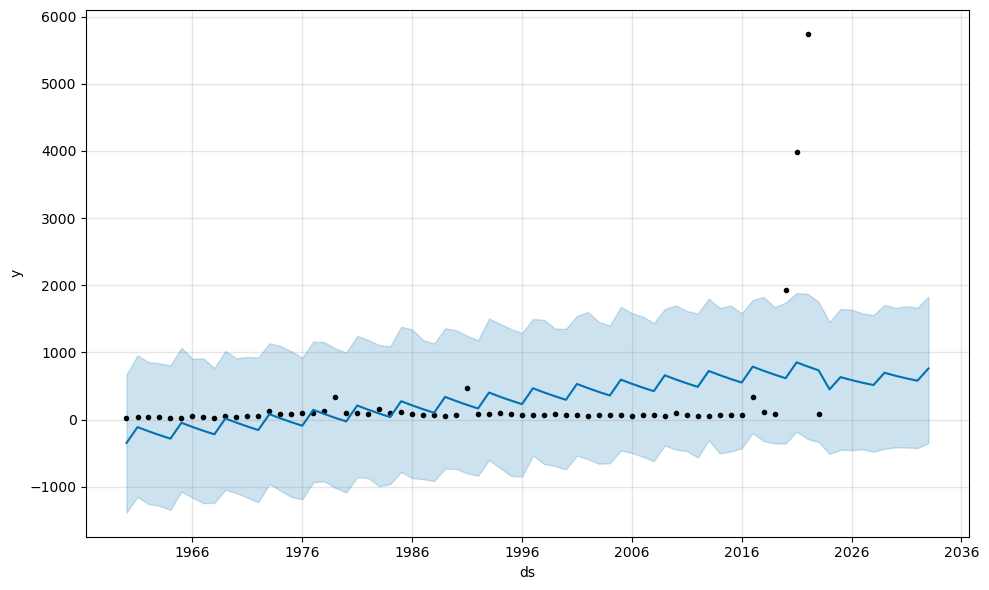

In [32]:
m.plot(forecast_playtime_trends);
plt.savefig('../charts/FuturePlaytimeTrends')

In [33]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_playtime_trends = forecast_playtime_trends.set_index('ds')
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_playtime_trends[['yhat','yhat_lower','yhat_upper']].head()

,yhat,yhat_lower,yhat_upper
ds,,,
1960-01-01,-346.910564,-1386.212078,672.655573
1961-01-01,-110.736732,-1147.933669,956.510650
1962-01-01,-172.380532,-1255.925622,857.099541
1963-01-01,-229.733252,-1283.446859,838.531898
1964-01-01,-282.698959,-1342.276197,808.533497


<Axes: xlabel='ds'>

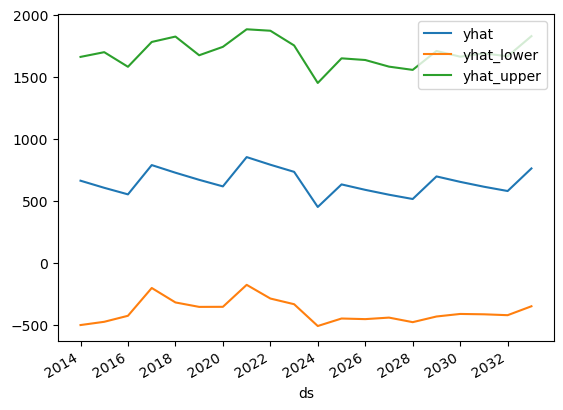

In [34]:
# From the forecast_playtime_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_playtime_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-20:,:].plot()

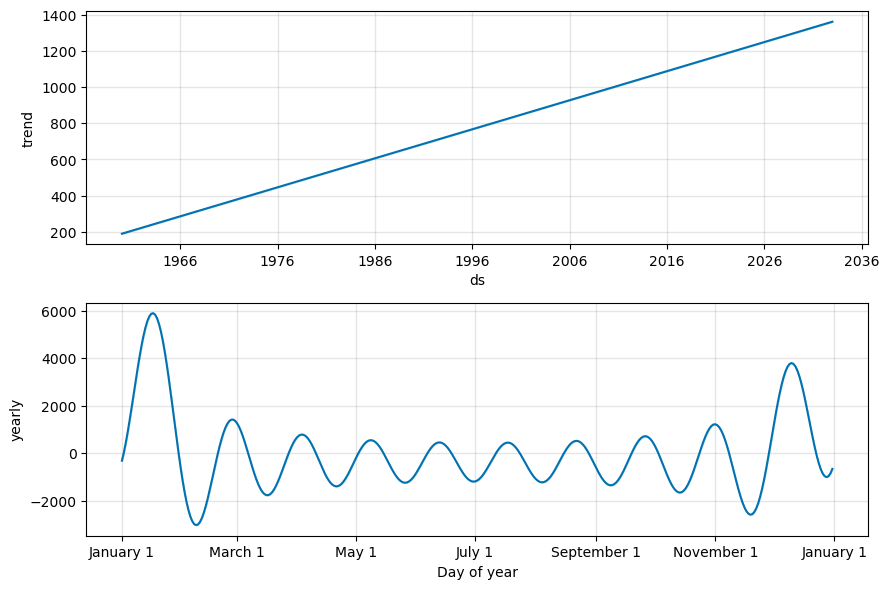

In [35]:
# Reset the index in the forecast_playtime_trends DataFrame
forecast_playtime_trends = forecast_playtime_trends.reset_index()
# Use the plot_components function to visualize the forecast results

forecast_figure = m.plot_components(forecast_playtime_trends)
plt.savefig('../charts/FuturePlaytimeTrends_1')